In [48]:
"""
INFSY 566- Discriminant Analysis with dataset containing no missing values

Classification technique: 
Model1: Linear Discriminant Analysis
Model2: Logistic Discriminant Analysis

Sampling strategy: Stratified K Fold

"""
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold

In [49]:
df=pd.read_csv('bank.csv', header=None)
print (df.head()) # see first six rows to check everything

      0     1     2     3  4
0 -0.45 -0.41  1.09  0.45  0
1 -0.56 -0.31  1.51  0.16  0
2  0.06  0.02  1.01  0.40  0
3 -0.07 -0.09  1.45  0.26  0
4 -0.10 -0.09  1.56  0.67  0


In [50]:
# Rename column titles
df.columns = ['v1', 'v2', 'v3', 'v4', 'decision']
print (df.head()) # see first six rows to check everything

     v1    v2    v3    v4  decision
0 -0.45 -0.41  1.09  0.45         0
1 -0.56 -0.31  1.51  0.16         0
2  0.06  0.02  1.01  0.40         0
3 -0.07 -0.09  1.45  0.26         0
4 -0.10 -0.09  1.56  0.67         0


In [51]:
X = df[['v1', 'v2', 'v3', 'v4']]
y = df['decision']

In [52]:
# Cross Validation using 10 fold sampling. n_repeats=3 means you repeat 10 folds 3 times

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [53]:
#Fit the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model1 = LinearDiscriminantAnalysis()
model1.fit(X, y) #learn Discriminant Function

LinearDiscriminantAnalysis()

In [54]:
#Fit the QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  
model2 = QuadraticDiscriminantAnalysis()
model2.fit(X, y)

QuadraticDiscriminantAnalysis()

In [55]:
#evaluate model1
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores1)) 

0.8666666666666667


In [56]:
#evaluate model2
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores2)) 

0.8783333333333333


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (train_test_split)
#Create Training and Test Dataset
(X_train, X_test, y_train, y_test)=train_test_split(X,y,random_state=1)

In [58]:

from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 19, 1: 15})
Counter({1: 10, 0: 2})


In [59]:
model1.fit(X_train, y_train) #learn decision tree
y_pred1=model1.predict(X_test) # predict test dataset

print()

In [60]:
model2.fit(X_train, y_train) #learn decision tree
y_pred2=model2.predict(X_test) # predict test dataset

[[2 0]
 [2 8]]


Text(50.722222222222214, 0.5, 'Actual')

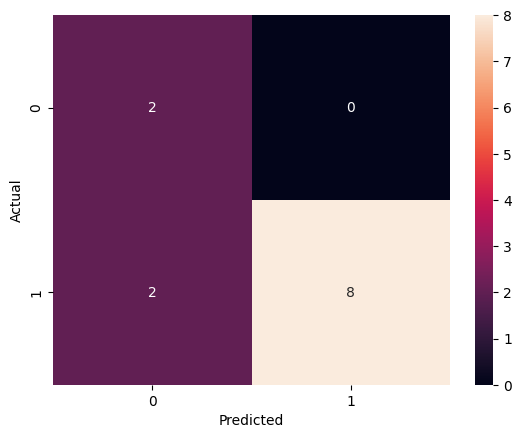

In [61]:
confusion=confusion_matrix(y_test,y_pred1)#,labels=[0,1])
print(confusion) # Column is Actual {0,1} and Row Title is Predicted {0,1}


#Pretty Confusion Matrix using Heatmap and Seaborn

#Heatmap of confusion matrix using seaborn
confusion_df=pd.DataFrame(confusion, index=range(2), columns=range(2))
import seaborn as sns
axes=sns.heatmap(confusion_df, annot=True)
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

In [62]:
# Classification Report
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.80      0.89        10

    accuracy                           0.83        12
   macro avg       0.75      0.90      0.78        12
weighted avg       0.92      0.83      0.85        12



[[2 0]
 [1 9]]


Text(50.722222222222214, 0.5, 'Actual')

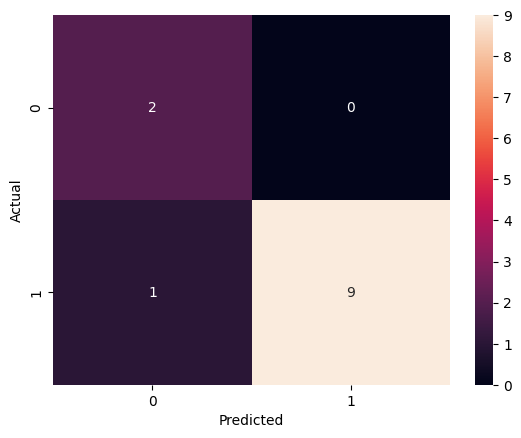

In [63]:
confusion=confusion_matrix(y_test,y_pred2)#,labels=[0,1])
print(confusion) # Column is Actual {0,1} and Row Title is Predicted {0,1}


#Pretty Confusion Matrix using Heatmap and Seaborn

#Heatmap of confusion matrix using seaborn
confusion_df=pd.DataFrame(confusion, index=range(2), columns=range(2))
import seaborn as sns
axes=sns.heatmap(confusion_df, annot=True)
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

In [64]:
# Classification Report
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.90      0.95        10

    accuracy                           0.92        12
   macro avg       0.83      0.95      0.87        12
weighted avg       0.94      0.92      0.92        12

